#Data Understanding

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from datetime import timedelta
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [4]:
df_raw = pd.read_csv('/content/drive/My Drive/DM/customer_supermarket.csv', sep='\t', index_col=0) #alternative in case of json source df.to_json('filename.json')

In [5]:
df_raw.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [6]:
# Print data examples
print(df_raw.head())
print(df_raw.tail())

  BasketID      BasketDate  ...                            ProdDescr  Qta
0   536365  01/12/10 08:26  ...   WHITE HANGING HEART T-LIGHT HOLDER    6
1   536365  01/12/10 08:26  ...                  WHITE METAL LANTERN    6
2   536365  01/12/10 08:26  ...       CREAM CUPID HEARTS COAT HANGER    8
3   536365  01/12/10 08:26  ...  KNITTED UNION FLAG HOT WATER BOTTLE    6
4   536365  01/12/10 08:26  ...       RED WOOLLY HOTTIE WHITE HEART.    6

[5 rows x 8 columns]
       BasketID      BasketDate  ...                        ProdDescr  Qta
541905   581587  09/12/11 12:50  ...     CHILDREN'S APRON DOLLY GIRL     6
541906   581587  09/12/11 12:50  ...    CHILDRENS CUTLERY DOLLY GIRL     4
541907   581587  09/12/11 12:50  ...  CHILDRENS CUTLERY CIRCUS PARADE    4
541908   581587  09/12/11 12:50  ...    BAKING SET 9 PIECE RETROSPOT     3
541909   581587  09/12/11 12:50  ...                          POSTAGE    1

[5 rows x 8 columns]


In [7]:
# Genral information
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         471910 non-null  object 
 1   BasketDate       471910 non-null  object 
 2   Sale             471910 non-null  object 
 3   CustomerID       406830 non-null  float64
 4   CustomerCountry  471910 non-null  object 
 5   ProdID           471910 non-null  object 
 6   ProdDescr        471157 non-null  object 
 7   Qta              471910 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 32.4+ MB


In [8]:
# Turn Sale from object to float
df_raw.Sale = df_raw.Sale.apply(lambda x: float(x.replace(',','.')))

# Turn BastedDate from object to datetime64
df_raw['BasketDate'] = pd.to_datetime(df_raw.BasketDate, format='%d/%m/%y %H:%M')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.4+ MB


In [9]:
# General statistics about categorical values
print("Number of different CustomerCountry: ", len(df_raw.CustomerCountry.unique()))
print("Number of different ProdID:          ", len(df_raw.ProdID.unique()))
print("Number of different CustomerID:      ", len(df_raw.CustomerID.unique()))
print("Number of different BasketID:        ", len(df_raw.BasketID.unique()))
print("Number of BasketID associated with anonymous customers: ", len(df_raw[df_raw['CustomerID'].isna()].BasketID.unique()))

Number of different CustomerCountry:  38
Number of different ProdID:           3953
Number of different CustomerID:       4373
Number of different BasketID:         24627
Number of BasketID associated with anonymous customers:  2437


In [10]:
# Sales with too low sale value
low_sale = df_raw[df_raw["Sale"] < 0.01]
print("Total transactions with Sale < 0.01: \t%d" % len(low_sale))

count = 0
for basketID in low_sale.BasketID.unique():
  if len(df_raw[df_raw.BasketID == basketID]) == 1:
    count += 1
print("BasketIDs containing just one product with Sale <= 0.01: \t%d" % count)

Total transactions with Sale < 0.01: 	1285
BasketIDs containing just one product with Sale <= 0.01: 	1055


### C symbol

In [11]:
cancelled_orders = df_raw[df_raw["BasketID"].str.contains("C")]
cancelled_orders_with_negative_qta = cancelled_orders[df_raw["Qta"] < 0]
negative_qta_only  = df_raw[df_raw["Qta"] < 0]
negative_qta_without_c_letter = df_raw[df_raw["Qta"] < 0]
negative_qta_without_c_letter = negative_qta_without_c_letter[~negative_qta_without_c_letter["BasketID"].str.contains("C")]

print("Number of entries that contains a negative quantity \t", len(negative_qta_only))
print("Number of entries that contains a character C as prefix of the BasketID \t", len(cancelled_orders))
print("Number of entries that contains a character C as prefix of the BasketID and negative quantity \t", len(cancelled_orders_with_negative_qta))
print("Number of entries that not contains a character C as prefix of the BasketID and have negative quantity", len(negative_qta_without_c_letter))

Number of entries that contains a negative quantity 	 9752
Number of entries that contains a character C as prefix of the BasketID 	 9084
Number of entries that contains a character C as prefix of the BasketID and negative quantity 	 9084
Number of entries that not contains a character C as prefix of the BasketID and have negative quantity 668


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [12]:
negative_qta_without_c_letter.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
4347,536764,2010-12-02 14:42:00,0.0,NaN,United Kingdom,84952C,NaN,-38
7188,536996,2010-12-03 15:30:00,0.0,NaN,United Kingdom,22712,NaN,-20
7192,537000,2010-12-03 15:32:00,0.0,NaN,United Kingdom,21414,NaN,-22
7193,537001,2010-12-03 15:33:00,0.0,NaN,United Kingdom,21653,NaN,-6
7195,537003,2010-12-03 15:33:00,0.0,NaN,United Kingdom,85126,NaN,-2


In [13]:
print("Number of entries that contains a character C as prefix of the BasketID and negative quantity \t", 
      len(negative_qta_without_c_letter))

nan_customerID = negative_qta_without_c_letter[negative_qta_without_c_letter["CustomerID"].isna()]
print("\t /w CustomerID NaN: ", len(nan_customerID))

zero_sale = negative_qta_without_c_letter[negative_qta_without_c_letter["Sale"] == 0]
print("\t /w 0 Sale: ", len(zero_sale))

nan_ProdDescr = negative_qta_without_c_letter[negative_qta_without_c_letter["ProdDescr"].isna()]
print("\t /w ProdDescr NaN: ", len(nan_ProdDescr))

Number of entries that contains a character C as prefix of the BasketID and negative quantity 	 668
	 /w CustomerID NaN:  668
	 /w 0 Sale:  668
	 /w ProdDescr NaN:  447


In [14]:
#Entries with negative Qta not starting with the letter c in the BasketID with a description of the product
negative_qta_without_c_letter[~negative_qta_without_c_letter["ProdDescr"].isna()].head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
13217,537425,2010-12-06 15:35:00,0.0,NaN,United Kingdom,84968F,check,-20
13218,537426,2010-12-06 15:36:00,0.0,NaN,United Kingdom,84968E,check,-35
22296,538162,2010-12-09 17:25:00,0.0,NaN,United Kingdom,46000M,Dotcom sales,-100
22297,538161,2010-12-09 17:25:00,0.0,NaN,United Kingdom,46000S,Dotcom sales,-100
42566,540012,2011-01-04 11:14:00,0.0,NaN,United Kingdom,22502,reverse 21/5/10 adjustment,-100


### Negative Qta

The purpose of this session is to check the quantity of items returned after being bought

In [15]:
neg_quantities = df_raw[df_raw['Qta'] < 0]
pos_quantities = df_raw[df_raw['Qta'] > 0]

In [16]:
print("Number of transactions with negative Qta: ", len(neg_quantities))
print("Number of transactions with positive Qta: ", len(pos_quantities))

Number of transactions with negative Qta:  9752
Number of transactions with positive Qta:  462158


In [17]:
pos_quantities.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [18]:
neg_quantities.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,D,Discount,-1
154,C536383,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
235,C536391,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
236,C536391,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
237,C536391,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24


In [19]:
# Find 'cancelled' transactions
pos_neg_join_result = neg_quantities.set_index(["CustomerID", "ProdID"]).join(pos_quantities.set_index(["CustomerID", "ProdID"]), lsuffix='_neg', rsuffix='_pos', how='left')

In [20]:
# Consider only those with same or greater Qta and same Sale
filtered_pos_neg_join_result = pos_neg_join_result[pos_neg_join_result["Qta_neg"] >= -1 * pos_neg_join_result["Qta_pos"]]
filtered_pos_neg_join_result = filtered_pos_neg_join_result[filtered_pos_neg_join_result["Sale_pos"] == filtered_pos_neg_join_result["Sale_neg"]]

In [21]:
#Compute time between each purchase and with the corresponding return
filtered_pos_neg_join_result["distance_in_time"] = pd.Series(filtered_pos_neg_join_result["BasketDate_neg"] - filtered_pos_neg_join_result["BasketDate_pos"],
                                                     index=filtered_pos_neg_join_result.index)
filtered_pos_neg_join_result = filtered_pos_neg_join_result.sort_values(by="distance_in_time")

In [22]:
#Keep only entries that were first purchased and then returned
filtered_pos_neg_join_result = filtered_pos_neg_join_result[filtered_pos_neg_join_result["distance_in_time"] >= pd.Timedelta(0)]

In [23]:
#since each transaction could correspond to more than one transaction, 
#only the one that has the shortest distance between purchase and return is kept
#(The dataframe was already ordered)

returned_items = filtered_pos_neg_join_result.set_index("BasketID_neg", append=True, drop=False)
returned_items = returned_items[~returned_items.index.duplicated(keep='first')]

In [24]:
print("Number of negative quantities joined with positive quantities (equals in abs): \t", len(returned_items))

Number of negative quantities joined with positive quantities (equals in abs): 	 7112


In [25]:
returned_items[returned_items["Qta_pos"] != -1 * returned_items["Qta_neg"]].head()

BasketID_neg  ... distance_in_time
CustomerID ProdID BasketID_neg               ...                 
16161.0    21259  C576324           C576324  ...  0 days 00:00:00
15465.0    22423  C547031           C547031  ...  0 days 00:00:00
                  C545671           C545671  ...  0 days 00:01:00
                  C547836           C547836  ...  0 days 00:01:00
13924.0    23404  C576850           C576850  ...  0 days 00:01:00

[5 rows x 13 columns]

In [26]:
returned_items_without_letter_c = returned_items[~returned_items["BasketID_neg"].str.contains("C")]
print("# Cancelation without C \t", len(returned_items_without_letter_c))

# Cancelation without C 	 0


###Special ProductIDs

In [27]:
# Correct 'm' into 'M'
df_raw.ProdID = df_raw.ProdID.apply(lambda x: x.replace('m','M'))
print(df_raw[~df_raw.ProdID.str.match('[0-9]+[A-Z]?')].ProdID.unique())
print("Total transactions: %d" % len(df_raw[~df_raw.ProdID.str.match('[0-9]+[A-Z]?')]))

['POST' 'D' 'C2' 'M' 'DOT' 'BANK CHARGES' 'S' 'AMAZONFEE' 'DCGS0076'
 'gift_0001_40' 'gift_0001_30' 'gift_0001_20' 'DCGS0072' 'DCGS0069'
 'DCGS0057' 'DCGS0003' 'DCGSSBOY' 'DCGSSGIRL' 'PADS' 'gift_0001_10'
 'DCGS0004' 'gift_0001_50' 'DCGS0073' 'DCGS0066P' 'DCGS0068' 'DCGS0067'
 'B' 'CRUK']
Total transactions: 2415


In [28]:
#POST as ProdID
POST = df_raw[df_raw.ProdID == 'POST']
print("\nTotal transactions: %d" % len(POST))
POST.head()


Total transactions: 1222


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
45,536370,2010-12-01 08:45:00,18.0,12583.0,France,POST,POSTAGE,3
386,536403,2010-12-01 11:27:00,15.0,12791.0,Netherlands,POST,POSTAGE,1
1123,536527,2010-12-01 13:04:00,18.0,12662.0,Germany,POST,POSTAGE,1
5095,536840,2010-12-02 18:27:00,18.0,12738.0,Germany,POST,POSTAGE,1
5258,536852,2010-12-03 09:51:00,18.0,12686.0,France,POST,POSTAGE,1


In [29]:
#D as ProdID
D = df_raw[df_raw.ProdID == 'D']
print("\nTotal transactions: %d" % len(D))
print("\nQta unique values: ", end='')
print(D.Qta.unique())
D.head()


Total transactions: 77

Qta unique values: [  -1 -720 -240  -18  -48  -96]


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
141,C536379,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,D,Discount,-1
9038,C537164,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,D,Discount,-1
14498,C537597,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,D,Discount,-1
19392,C537857,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,D,Discount,-1
31134,C538897,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,D,Discount,-1


In [30]:
#C2 as ProdID
C2 = df_raw[df_raw.ProdID == 'C2']
print("\nTotal transactions: %d" % len(C2))
print("\nQta unique valies:")
print(C2.Qta.unique())
C2.head()


Total transactions: 141

Qta unique valies:
[ 1 -1  2]


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1423,536540,2010-12-01 14:05:00,50.0,14911.0,EIRE,C2,CARRIAGE,1
12119,537368,2010-12-06 12:40:00,50.0,14911.0,EIRE,C2,CARRIAGE,1
12452,537378,2010-12-06 13:06:00,50.0,14911.0,EIRE,C2,CARRIAGE,1
19975,537963,2010-12-09 11:30:00,50.0,13369.0,United Kingdom,C2,CARRIAGE,1
20016,538002,2010-12-09 11:48:00,50.0,14932.0,Channel Islands,C2,CARRIAGE,1


In [31]:
#M as ProdID
M = df_raw[df_raw.ProdID == 'M']
print("\nTotal transactions: %d" % len(M))
M.head()


Total transactions: 507


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
2239,536569,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,M,Manual,1
2250,536569,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,M,Manual,1
6798,536981,2010-12-03 14:26:00,0.85,14723.0,United Kingdom,M,Manual,2
7976,537077,2010-12-05 11:59:00,0.42,17062.0,United Kingdom,M,Manual,12
8530,537137,2010-12-05 12:43:00,0.85,16327.0,United Kingdom,M,Manual,36


In [32]:
#DOT as ProdID
DOT = df_raw[df_raw.ProdID == 'DOT']
print("\nTotal transactions:\t%d" % len(DOT))
print("Qta unique valies: \t",end='')
print(DOT.Qta.unique())
print("CustomerID unique valies:\t", end='')
print(DOT.CustomerID.unique())
DOT[~DOT.CustomerID.isna()].head()


Total transactions:	338
Qta unique valies: 	[ 1 -1]
CustomerID unique valies:	[   nan 14096.]


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
317507,564764,2011-08-30 10:49:00,11.17,14096.0,United Kingdom,DOT,DOTCOM POSTAGE,1
324002,565383,2011-09-02 15:45:00,16.46,14096.0,United Kingdom,DOT,DOTCOM POSTAGE,1
333756,566217,2011-09-09 15:17:00,13.16,14096.0,United Kingdom,DOT,DOTCOM POSTAGE,1
338830,566566,2011-09-13 12:32:00,85.58,14096.0,United Kingdom,DOT,DOTCOM POSTAGE,1
350600,567656,2011-09-21 14:40:00,878.55,14096.0,United Kingdom,DOT,DOTCOM POSTAGE,1


In [33]:
#BANK CHARGES as ProdID
BANK_CHARGES = df_raw[(df_raw.ProdID == 'BANK CHARGES')]
print("\nTotal transactions:\t%d" % len(BANK_CHARGES))
BANK_CHARGES.head()
# If CustomerID is not null then we always have Qta=1 and Sale=15.00 but the
# corresponding BasketIDs contain only these                          
# In the other cases Qta=-1 and Sale has variable value              


Total transactions:	25


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
4406,536779,2010-12-02 15:08:00,15.00,15823.0,United Kingdom,BANK CHARGES,Bank Charges,1
14435,C537572,2010-12-07 12:00:00,95.38,NaN,United Kingdom,BANK CHARGES,Bank Charges,-1
28992,C538680,2010-12-13 17:10:00,966.92,NaN,United Kingdom,BANK CHARGES,Bank Charges,-1
62508,541505,2011-01-18 15:58:00,15.00,15939.0,United Kingdom,BANK CHARGES,Bank Charges,1
90558,C544049,2011-02-15 12:39:00,566.37,NaN,United Kingdom,BANK CHARGES,Bank Charges,-1


In [34]:
#S as ProdID
S = df_raw[df_raw.ProdID == 'S']
print("\nTotal transactions:\t%d" % len(S))
S.head()


Total transactions:	26


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
14436,C537581,2010-12-07 12:03:00,12.95,NaN,United Kingdom,S,SAMPLES,-1
14437,C537581,2010-12-07 12:03:00,52.00,NaN,United Kingdom,S,SAMPLES,-1
96682,C544580,2011-02-21 14:25:00,5.79,NaN,United Kingdom,S,SAMPLES,-1
96684,C544580,2011-02-21 14:25:00,8.74,NaN,United Kingdom,S,SAMPLES,-1
96686,C544580,2011-02-21 14:25:00,9.99,NaN,United Kingdom,S,SAMPLES,-1


In [35]:
#AMAZONFEE as ProdID
AMAZONFEE = df_raw[df_raw.ProdID == 'AMAZONFEE']
print("\nTotal transactions:\t%d" % len(AMAZONFEE))
AMAZONFEE.head()


Total transactions:	17


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
16313,C537647,2010-12-07 15:41:00,5519.25,NaN,United Kingdom,AMAZONFEE,AMAZON FEE,-1
16356,C537651,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,AMAZONFEE,AMAZON FEE,-1
43703,C540118,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,AMAZONFEE,AMAZON FEE,-1
96844,C544587,2011-02-21 15:07:00,5575.28,NaN,United Kingdom,AMAZONFEE,AMAZON FEE,-1
124787,C546989,2011-03-18 12:59:00,5225.03,NaN,United Kingdom,AMAZONFEE,AMAZON FEE,-1


In [36]:
#DCGS* as ProdID
DCGS = df_raw[(df_raw.ProdID == 'DCGS0076') | (df_raw.ProdID == 'DCGS0072') | (df_raw.ProdID == 'DCGS0069') | (df_raw.ProdID == 'DCGS0057') 
| (df_raw.ProdID == 'DCGS0003') | (df_raw.ProdID == 'DCGS0004') | (df_raw.ProdID == 'DCGS0073') | (df_raw.ProdID == 'DCGS0066P')
| (df_raw.ProdID == 'DCGS0068') | (df_raw.ProdID == 'DCGS0067')]
print("\nTotal transactions:\t%d" % len(DCGS))
DCGS.head()

# If Qta<0 the correspondin basket contains only that element 
# In the other cases the description makes sense and the BasketID contains more products


Total transactions:	12


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
21326,538071,2010-12-09 14:09:00,16.13,NaN,United Kingdom,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1
74838,542531,2011-01-28 13:08:00,0.00,NaN,United Kingdom,DCGS0072,NaN,-1
75053,542541,2011-01-28 14:25:00,15.79,NaN,United Kingdom,DCGS0069,OOH LA LA DOGS COLLAR,1
75295,542582,2011-01-28 15:01:00,0.00,NaN,United Kingdom,DCGS0057,NaN,-6
76251,542622,2011-01-31 09:09:00,2.46,NaN,United Kingdom,DCGS0003,BOXED GLASS ASHTRAY,1


In [37]:
#DCGSS* as ProdID
DCGSS = df_raw[(df_raw.ProdID == 'DCGSSGIRL') | (df_raw.ProdID == 'DCGSSBOY')]
print("\nTotal transactions:\t%d" % len(DCGSS))
DCGSS.head()


Total transactions:	10


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
112723,545897,2011-03-07 17:22:00,3.29,NaN,United Kingdom,DCGSSBOY,BOYS PARTY BAG,5
116891,546306,2011-03-10 16:16:00,3.29,NaN,United Kingdom,DCGSSBOY,BOYS PARTY BAG,1
116892,546306,2011-03-10 16:16:00,3.29,NaN,United Kingdom,DCGSSGIRL,GIRLS PARTY BAG,2
128269,547250,2011-03-22 09:30:00,3.29,NaN,United Kingdom,DCGSSGIRL,GIRLS PARTY BAG,2
150864,549524,2011-04-08 15:42:00,3.29,NaN,United Kingdom,DCGSSGIRL,GIRLS PARTY BAG,1


In [38]:
#gift* as ProdID
gift = df_raw[(df_raw.ProdID == 'gift_0001_40') | (df_raw.ProdID == 'gift_0001_30') | (df_raw.ProdID == 'gift_0001_20') 
| (df_raw.ProdID == 'gift_0001_50')| (df_raw.ProdID == 'gift_0001_10')]
print("\nTotal transactions:\t%d" % len(gift))
gift.head()


Total transactions:	18


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
38248,539492,2010-12-20 10:14:00,34.04,NaN,United Kingdom,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1
44725,540238,2011-01-05 14:44:00,25.53,NaN,United Kingdom,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1
44794,540238,2011-01-05 14:44:00,17.02,NaN,United Kingdom,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1
55589,540995,2011-01-13 09:30:00,16.67,NaN,United Kingdom,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1
94054,544323,2011-02-17 15:51:00,25.00,NaN,United Kingdom,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1


In [39]:
#PADS as ProdID
PADS = df_raw[df_raw.ProdID == 'PADS']
print("\nTotal transactions:\t%d" % len(PADS))
PADS.head()


Total transactions:	4


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
157195,550193,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,PADS,PADS TO MATCH ALL CUSHIONS,1
279045,561226,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,PADS,PADS TO MATCH ALL CUSHIONS,1
358670,568158,2011-09-25 12:22:00,0.000,16133.0,United Kingdom,PADS,PADS TO MATCH ALL CUSHIONS,1
359871,568200,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,PADS,PADS TO MATCH ALL CUSHIONS,1


In [40]:
#B as ProdID
B = df_raw[df_raw.ProdID == 'B']
B.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
299983,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,B,Adjust bad debt,1
299984,A563187,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,B,Adjust bad debt,1


In [41]:
#ProdID that starts with a letter that is not C
A = df_raw[~df_raw.BasketID.str.isnumeric()]
A = A[~A.BasketID.str.startswith("C")]
A.head()
# Only the baskets below have 'A' in their ID (and contain only those 'products')

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
299983,A563186,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,B,Adjust bad debt,1
299984,A563187,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,B,Adjust bad debt,1


In [42]:
#CRUK as ProdID
CRUK = df_raw[df_raw.ProdID == 'CRUK']
print("\nTotal transactions:\t%d" % len(CRUK))
CRUK.head()
# The corresponding baskets contain only 'CRUK' 
# Also, coming from the same customer (14096)  Who is it?


Total transactions:	16


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
317508,C564763,2011-08-30 10:49:00,1.60,14096.0,United Kingdom,CRUK,CRUK Commission,-1
324003,C565382,2011-09-02 15:45:00,13.01,14096.0,United Kingdom,CRUK,CRUK Commission,-1
333745,C566216,2011-09-09 15:17:00,15.96,14096.0,United Kingdom,CRUK,CRUK Commission,-1
338812,C566565,2011-09-13 12:32:00,52.24,14096.0,United Kingdom,CRUK,CRUK Commission,-1
350582,C567655,2011-09-21 14:40:00,608.66,14096.0,United Kingdom,CRUK,CRUK Commission,-1


###Data duplication check

In [43]:
#No user bought something at the same time in two different countries
not_nan_customers = df_raw[~df_raw['CustomerID'].isna()]
not_nan_customers_joined_each_other = not_nan_customers.set_index(['CustomerID','BasketDate']).join(not_nan_customers.set_index(['CustomerID','BasketDate']), lsuffix='_neg', rsuffix='_pos', how='left').reset_index()
not_nan_customers_joined_each_other = not_nan_customers_joined_each_other[['CustomerID','BasketDate','CustomerCountry_pos','CustomerCountry_neg']]
custumer_in_different_countries_and_same_time = not_nan_customers_joined_each_other[not_nan_customers_joined_each_other['CustomerCountry_neg'] != not_nan_customers_joined_each_other['CustomerCountry_pos']]
print('Number of purchases at the same time by the same customer in two different stats: ' + str(len(custumer_in_different_countries_and_same_time)))


Number of purchases at the same time by the same customer in two different stats: 0


In [44]:
join_result = df_raw[~df_raw['CustomerID'].isna()]

join_result = join_result.set_index(['CustomerID','BasketDate']).join(join_result.set_index(['CustomerID','BasketDate']), lsuffix='_neg', rsuffix='_pos', how='left').reset_index()
join_result = join_result[['CustomerID','BasketDate','BasketID_neg','BasketID_pos','ProdID_neg','ProdID_pos']]
join_result = join_result[join_result['BasketID_neg'] != join_result['BasketID_pos']]
join_result.drop_duplicates(['BasketID_neg','BasketID_pos'],inplace=True)
join_result.drop_duplicates(['CustomerID','BasketDate'],inplace=True)

print("Number of different BasketID with the same CustomerID at the same time: " + str(len(join_result)))

Number of different BasketID with the same CustomerID at the same time: 187


In [45]:
join_result = df_raw[~df_raw['CustomerID'].isna()]
join_result = join_result.set_index(['BasketID']).join(join_result.set_index(['BasketID']), lsuffix='_neg', rsuffix='_pos', how='left').reset_index()
join_result = join_result[join_result['CustomerID_neg'] != join_result['CustomerID_pos']] 
print("Number of different customerID with the same BasketID: " + str(len(join_result)))

Number of different customerID with the same BasketID: 0


In [47]:
merged_duplicate_entries = df_raw.groupby(['BasketID','ProdID','BasketDate','CustomerCountry','Sale','CustomerID','ProdDescr'],dropna=False).Qta.sum().to_frame('Qta').reset_index()
print('Excess transaction within the basket having only different Qta: ' + str(len(df_raw) - len(merged_duplicate_entries)))

Excess transaction within the basket having only different Qta: 10029


In [48]:
#Same products may have different descriptions
def grather_than_one(x):
  if len(x) > 1:
    return x

entries_without_ProdDescr_nan = df_raw[~df_raw['ProdDescr'].isna()]
products_with_all_their_descriptions = entries_without_ProdDescr_nan.groupby('ProdID').ProdDescr.unique().to_frame('descr').reset_index()
products_with_all_their_descriptions.descr = products_with_all_their_descriptions.descr.apply(lambda x: grather_than_one(x))

products_with_all_their_descriptions = products_with_all_their_descriptions[~products_with_all_their_descriptions.descr.isna()]

products_with_all_their_descriptions.head()

,ProdID,descr
29,16008,"[SMALL FOLDING SCISSOR(POINTED EDGE), check]"
46,16156L,"[WRAP, CAROUSEL, WRAP CAROUSEL]"
53,16162M,"[alan hodge cant mamage this section, THE KING..."
54,16168M,"[FUNKY MONKEY GIFT BAG MEDIUM, found]"
55,16169E,"[WRAP 50'S CHRISTMAS, check]"


###Partitioning

In [49]:
# Orders
df_orders = df_raw[df_raw["Qta"] > 0] 
df_orders = df_orders[~df_orders["BasketID"].str.startswith("C")]
df_orders = df_orders[df_orders.ProdID.str.match('[0-9]+[a-z]?')]
df_orders['BasketDate'] = pd.to_datetime(df_orders.BasketDate, format='%d/%m/%y %H:%M')
print("Cardinality of orders subset: %d/%d" % (len(df_orders), len(df_raw)))
df_orders.head()

Cardinality of orders subset: 460214/471910


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [50]:
# Returns
df_returns = df_raw[df_raw["Qta"] < 0]
df_returns = df_returns[df_returns["BasketID"].str.startswith("C")]
df_returns = df_returns[df_returns.ProdID.str.match('[0-9]+[a-z]?')]
df_returns['BasketDate'] = pd.to_datetime(df_returns.BasketDate, format='%d/%m/%y %H:%M')
print("Cardinality of returns subset: %d/%d" % (len(df_returns), len(df_raw)))
df_returns.head()

Cardinality of returns subset: 8620/471910


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
154,C536383,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,35004C,SET OF 3 COLOURED FLYING DUCKS,-1
235,C536391,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,22556,PLASTERS IN TIN CIRCUS PARADE,-12
236,C536391,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,21984,PACK OF 12 PINK PAISLEY TISSUES,-24
237,C536391,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24
238,C536391,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,21980,PACK OF 12 RED RETROSPOT TISSUES,-24


###Distributions

In [51]:
# Prepare dataset for plots that use Total (Qta * Sale)
def get_df_with_total(df_target):
  df = df_target.copy()
  df['BasketDay'] = df.BasketDate.dt.dayofweek
  df['BasketMonth'] = df.BasketDate.dt.month
  df['BasketWeekOfYear'] = df.BasketDate.dt.isocalendar().week
  df['BasketYear'] = df.BasketDate.dt.year
  df['BasketWeekOfMonth'] = df.BasketDate.apply(lambda d: (d.day-1) // 7 + 1)
  df['Tot'] = df['Qta'] * df['Sale']
  return df

In [52]:
df_to_plot = get_df_with_total(df_orders.copy())

#### Numbers of orders in a period of time

In [53]:
def basketId_numbers_per_period(df, groupby_period, xlabel):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5))
  res = df.copy().groupby([groupby_period, "BasketWeekOfYear", "BasketYear"]).BasketID.nunique().reset_index()
  res = res.groupby([groupby_period]).BasketID.mean()
  res.plot.bar(ax=ax1)
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel("Mean")

  res = df.copy().groupby([groupby_period, "BasketWeekOfYear", "BasketYear"]).BasketID.nunique().reset_index()
  res = res.groupby([groupby_period]).BasketID.std()
  res.plot.bar(ax=ax2)
  ax2.set_xlabel(xlabel)
  ax2.set_ylabel('Standard deviation') 

  res = df.copy().groupby([groupby_period]).BasketID.nunique()
  res.plot.bar(ax=ax3)
  ax3.set_xlabel(xlabel)
  ax3.set_ylabel("Count")
  
  return fig

def basketId_numbers_per_day_of_week(df, path):
  fig = basketId_numbers_per_period(df, "BasketDay", "Day of week")
  print("# Basket per day of week")

  plt.tight_layout()
  plt.savefig(path + 'basketId_numbers_per_day_of_week.svg')

def basketId_numbers_per_week_of_month(df, path):
  fig = basketId_numbers_per_period(df, "BasketWeekOfMonth", "Week of month")
  print("# Basket per week of month")

  plt.tight_layout()
  plt.savefig(path + 'basketId_numbers_per_week_of_month.svg')

# Basket per day of week


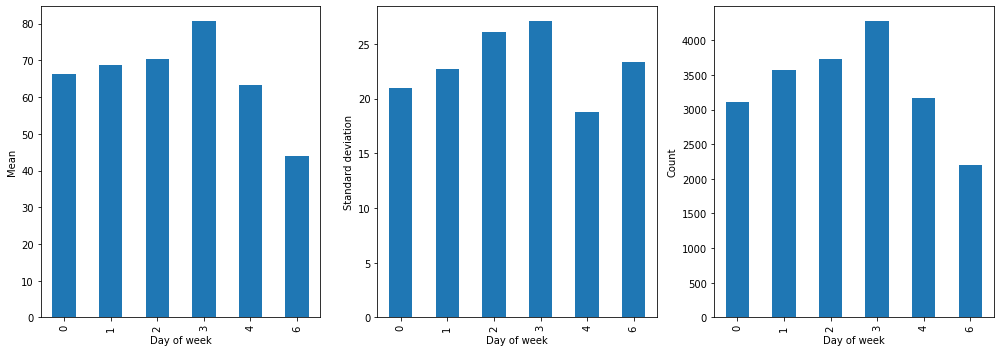

In [54]:
basketId_numbers_per_day_of_week(df_to_plot.copy(), './')#"/content/drive/My Drive/DM/Data_Understanding/Plots/")

# Basket per week of month


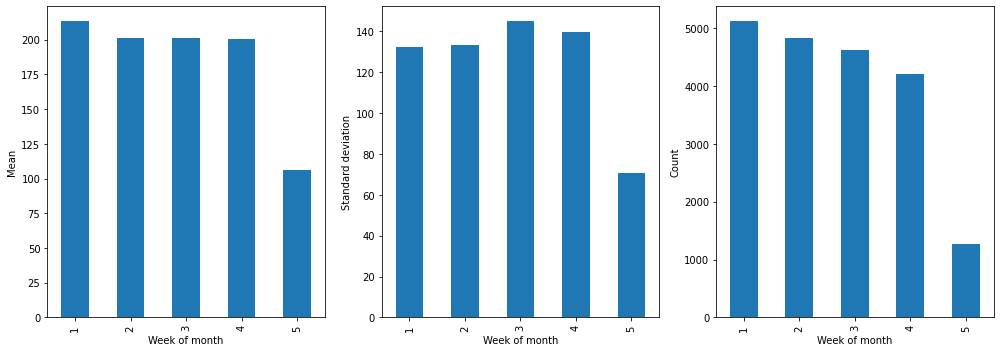

In [55]:
basketId_numbers_per_week_of_month(df_to_plot,'./') #"/content/drive/My Drive/DM/Data_Understanding/Plots/")

In [56]:
def distribution_for_period(df, by, value, bins):
  df_plot = df.copy()
  df_plot = df_plot[df_plot[by] == value].groupby(["BasketWeekOfYear", "BasketYear"]).BasketID.nunique().reset_index()
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
  boxplot = df_plot.boxplot(column="BasketID", ax = ax1)
  ax1.set_ylabel("")
  ax1.set_xticklabels("")
  histplot = df_plot.hist(column="BasketID", ax = ax2, bins=bins)
  ax2.set_title("")
  return fig

def distribution_for_day_of_week(df, dayOfWeek, bins = 20):
  return distribution_for_period(df, "BasketDay", dayOfWeek, bins)

def distribution_for_week_of_month(df, basketWeekOfMonth, bins = 20):
  return distribution_for_period(df, "BasketWeekOfMonth", basketWeekOfMonth, bins)

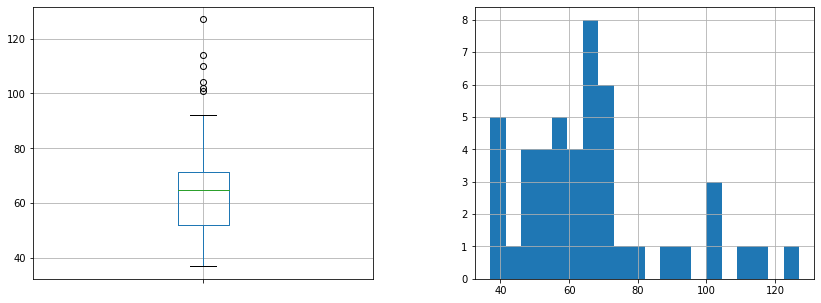

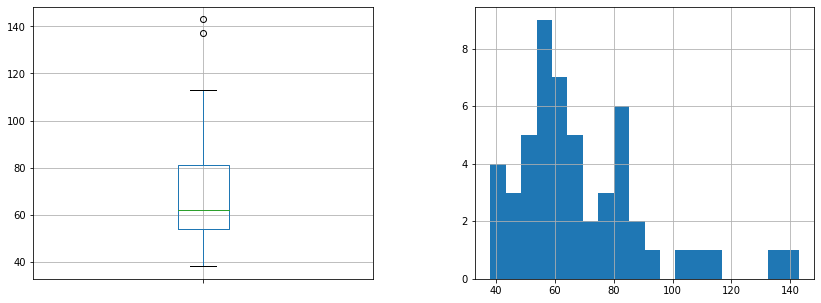

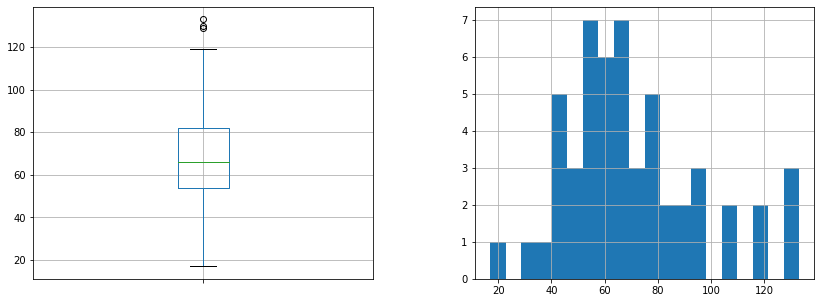

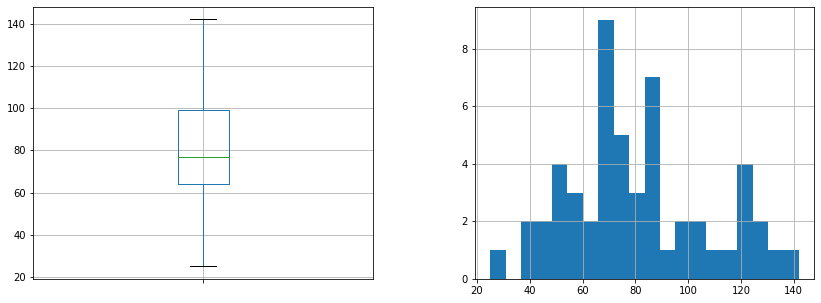

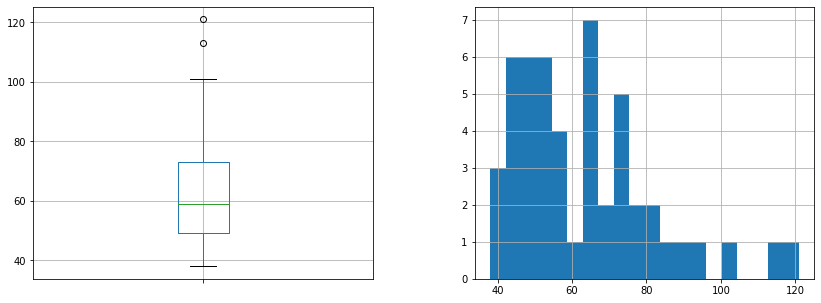

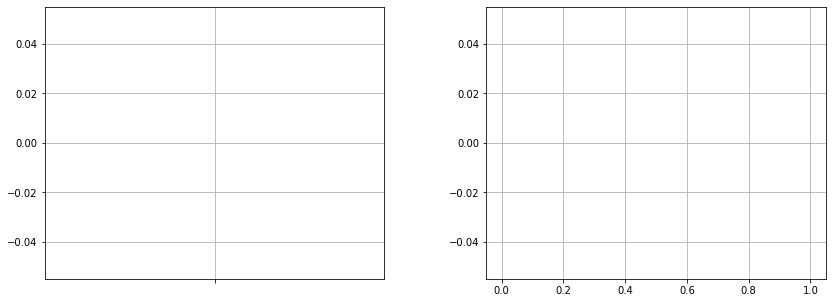

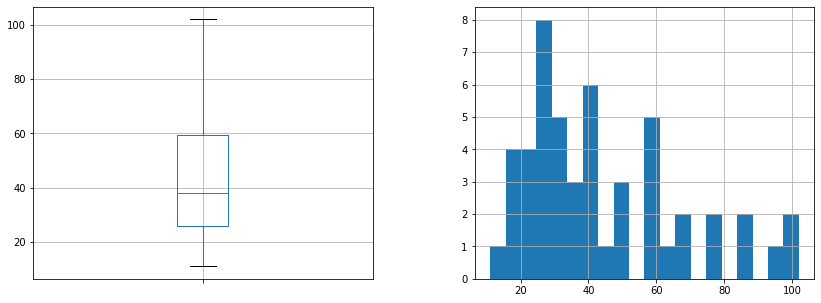

In [57]:
for i in range(0, 7):
  fig = distribution_for_day_of_week(df_to_plot, i)
  plt.savefig("./" + "basketId_numbers-" + str(i + 1) +'th-day-of-week-distribution.svg')
  #plt.savefig("/content/drive/My Drive/DM/Data_Understanding/Plots/" + "basketId_numbers-" + str(i + 1) +'th-day-of-week-distribution.svg')

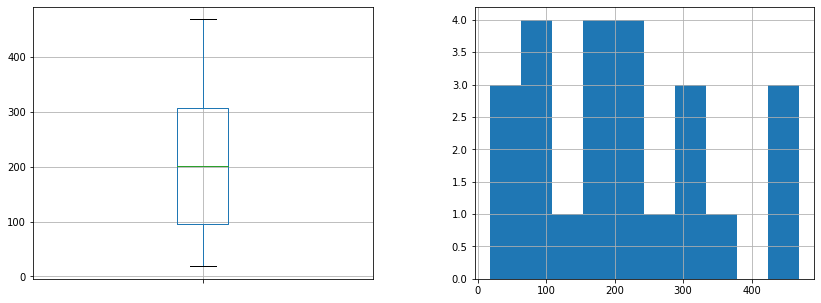

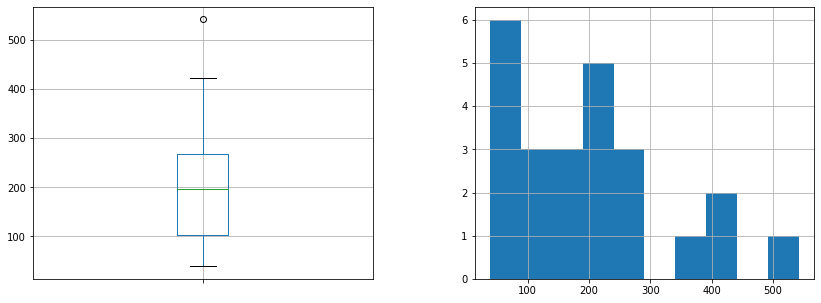

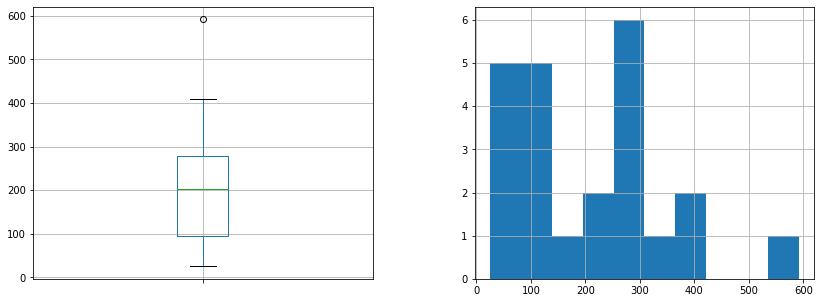

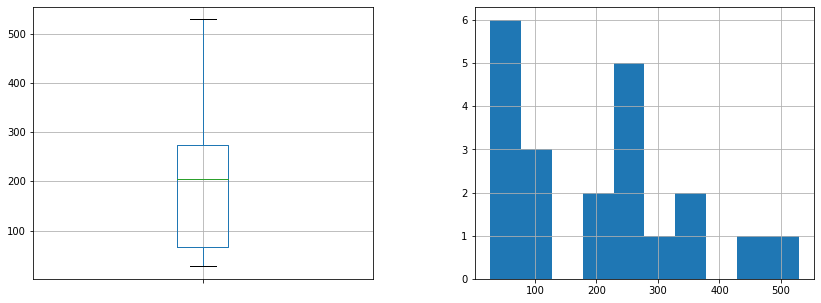

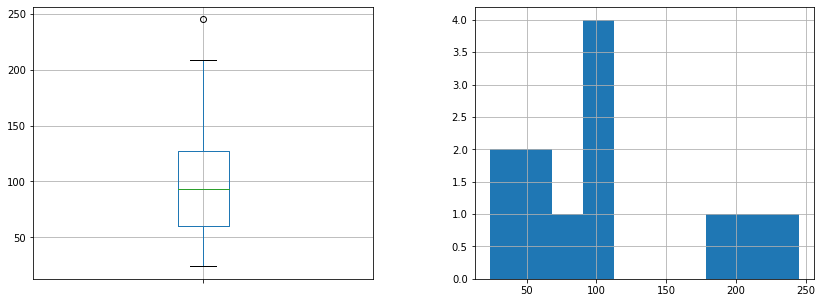

In [58]:
for i in range(1, 6):
  fig = distribution_for_week_of_month(df_to_plot, i, bins=10)
  plt.savefig("./" + "basketId_numbers-" + str(i) +'th-week-of-month-distribution.svg')
  #plt.savefig("/content/drive/My Drive/DM/Data_Understanding/Plots/" + "basketId_numbers-" + str(i) +'th-week-of-month-distribution.svg')

#### Totals spent in a period of time

In [59]:
def totals_spent_per_period(df, groupby_period, xlabel):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 5))
  res = df.copy().groupby([groupby_period, "BasketWeekOfYear", "BasketYear"]).Tot.sum().reset_index()
  res = res.groupby([groupby_period]).Tot.mean()
  res.plot.bar(ax=ax1)
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel("Mean")

  res = df.copy().groupby([groupby_period, "BasketWeekOfYear", "BasketYear"]).Tot.sum().reset_index()
  res = res.groupby([groupby_period]).Tot.std()
  res.plot.bar(ax=ax2)
  ax2.set_xlabel(xlabel)
  ax2.set_ylabel('Standard deviation') 

  res = df.copy().groupby([groupby_period]).Tot.sum()
  res.plot.bar(ax=ax3)
  ax3.set_xlabel(xlabel)
  ax3.set_ylabel("Sum")
  
  return fig

def totals_spent_per_day_of_week(df, path):
  fig = totals_spent_per_period(df, "BasketDay", "Day of week")
  print("Baskets total per day of week")

  plt.tight_layout()
  plt.savefig(path + 'totals_spent_per_day_of_week.svg')

def totals_spent_per_week_of_month(df, path):
  fig = totals_spent_per_period(df, "BasketWeekOfMonth", "Week of month")
  print("Basket total per week of month")

  plt.tight_layout()
  plt.savefig(path + 'totals_spent_per_week_of_month.svg')

Baskets total per day of week


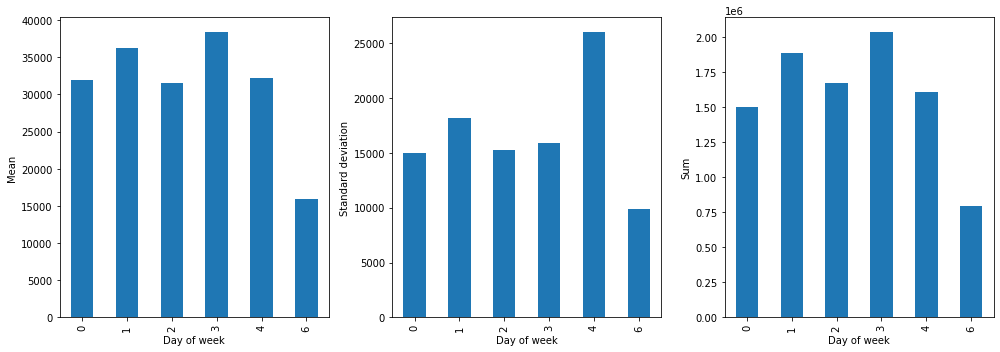

In [60]:
totals_spent_per_day_of_week(df_to_plot.copy(),'./')#"/content/drive/My Drive/DM/Data_Understanding/Plots/")

Basket total per week of month


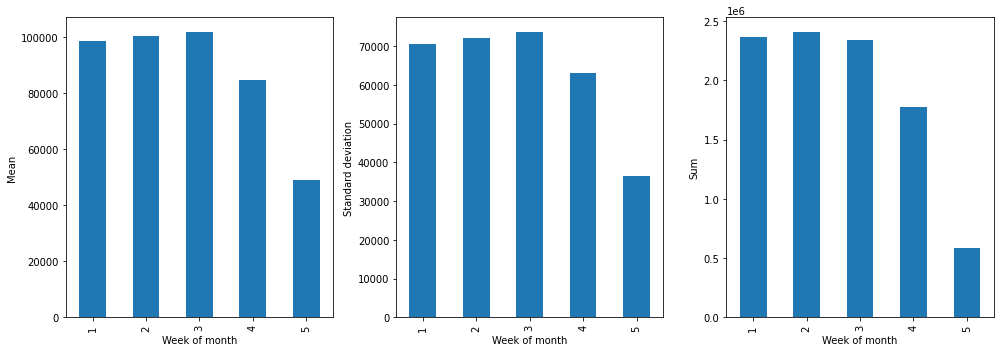

In [61]:
totals_spent_per_week_of_month(df_to_plot.copy(), './')#"/content/drive/My Drive/DM/Data_Understanding/Plots/")

In [62]:
def spent_distribution_for_period(df, by, value, bins):
  df_plot = df.copy()
  df_plot = df_plot[df_plot[by] == value].groupby(["BasketWeekOfYear", "BasketYear"]).Tot.sum().reset_index()
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))
  boxplot = df_plot.boxplot(column="Tot", ax = ax1)
  ax1.set_ylabel("")
  ax1.set_xticklabels("")
  histplot = df_plot.hist(column="Tot", ax = ax2, bins=bins)
  ax2.set_title("")
  return fig

def spent_distribution_for_day_of_week(df, dayOfWeek, bins = 20):
  return spent_distribution_for_period(df, "BasketDay", dayOfWeek, bins)

def spent_distribution_for_week_of_month(df, basketWeekOfMonth, bins = 20):
  return spent_distribution_for_period(df, "BasketWeekOfMonth", basketWeekOfMonth, bins)

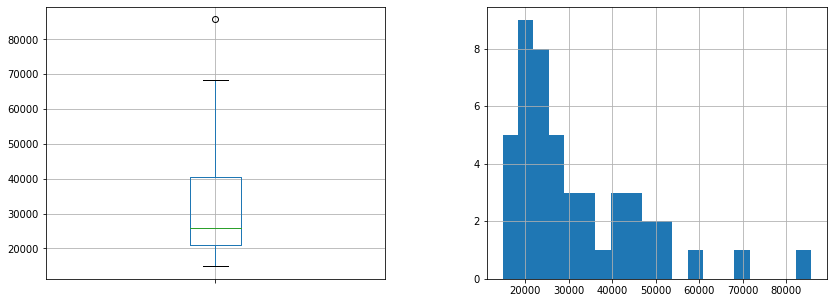

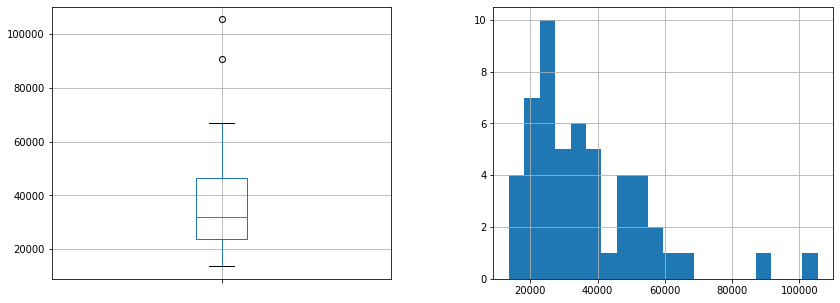

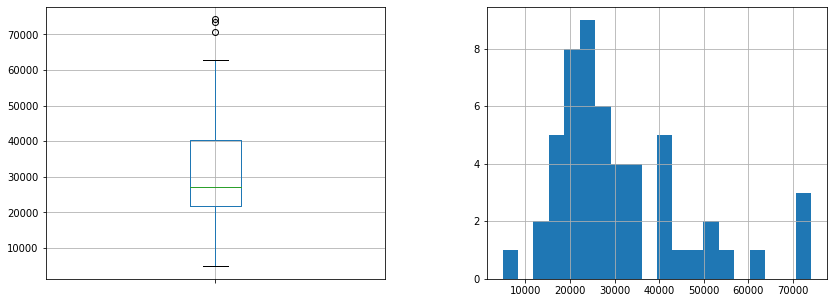

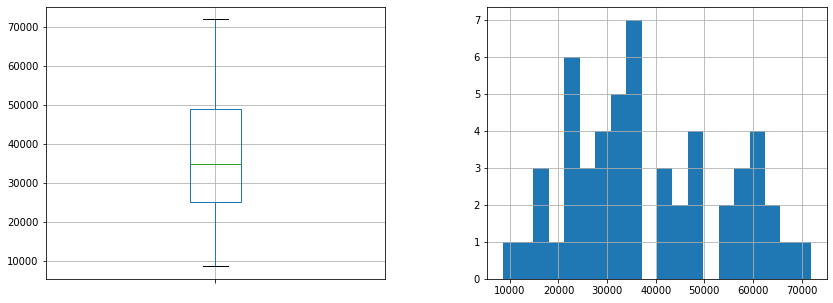

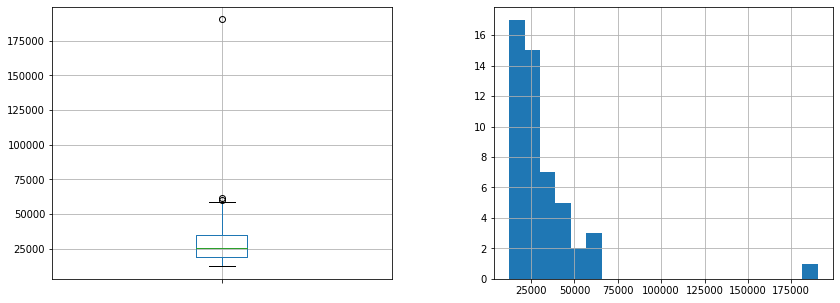

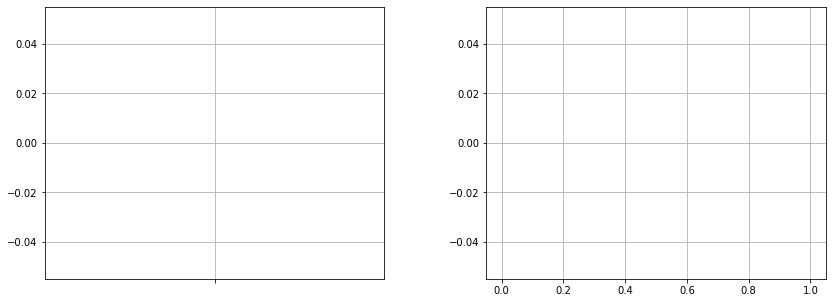

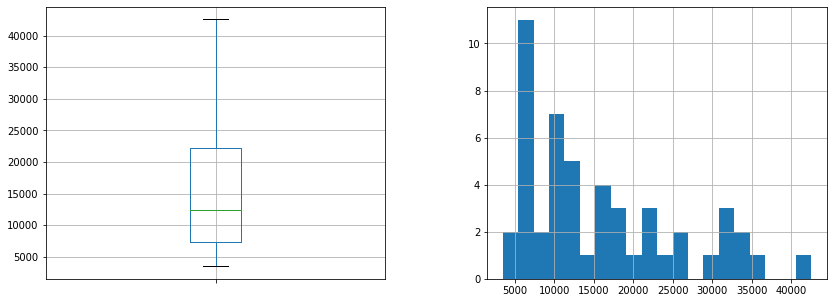

In [63]:
for i in range(0, 7):
  fig = spent_distribution_for_day_of_week(df_to_plot, i)
  plt.savefig("./" + "totals_spent-" + str(i + 1) +'th-day-of-week-distribution.svg')
  #plt.savefig("/content/drive/My Drive/DM/Data_Understanding/Plots/" + "totals_spent-" + str(i + 1) +'th-day-of-week-distribution.svg')

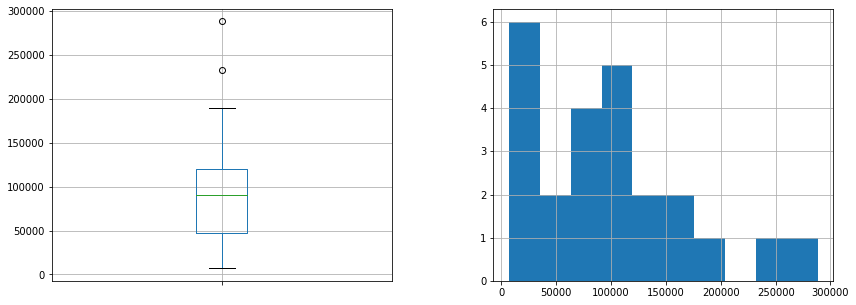

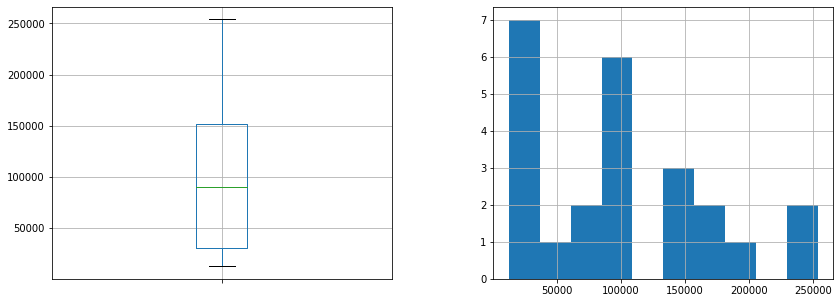

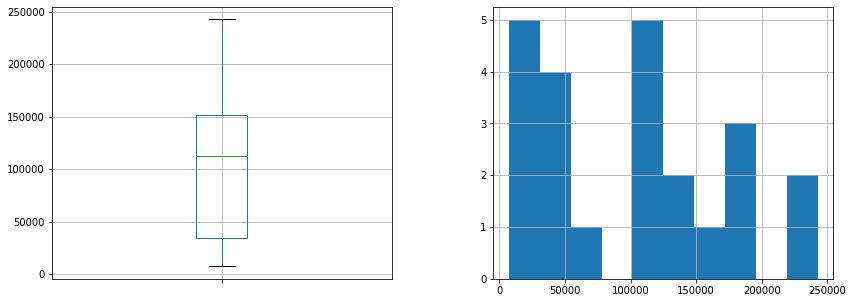

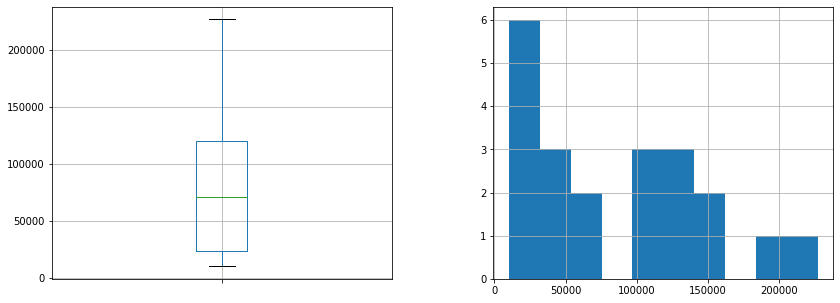

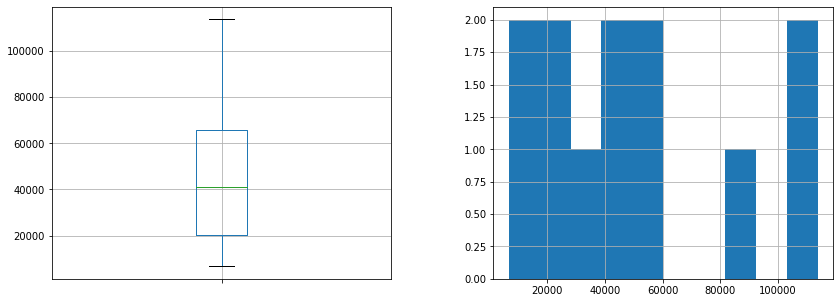

In [64]:
for i in range(1, 6):
  fig = spent_distribution_for_week_of_month(df_to_plot, i, bins=10)
  plt.savefig("./" + "totals_spent-" + str(i) +'th-week-of-month-distribution.svg')
  #plt.savefig("/content/drive/My Drive/DM/Data_Understanding/Plots/" + "totals_spent-" + str(i) +'th-week-of-month-distribution.svg')

#### Distribution of orders among countries

In [65]:
def country_distribution(df):
  fig,ax = plt.subplots(2,2,figsize=((15,10)))

  res = df.groupby(['CustomerCountry']).BasketID.nunique()
  ax[0][0].set_title('# Basket')
  ax[0][0].set_ylim(0, 1000)
  res.plot.bar(ax=ax[0][0])

  df_plot = df.groupby(['BasketID','CustomerCountry']).Qta.sum().reset_index()
  res = df_plot.groupby('CustomerCountry').Qta.mean()
  ax[0][1].set_title('Qta mean')
  res.plot.bar(ax=ax[0][1])

  df_plot = df.groupby(['BasketID','CustomerCountry']).Tot.sum().reset_index()
  res = df_plot.groupby('CustomerCountry').Tot.mean()
  ax[1][0].set_title('Tot mean')
  res.plot.bar(ax=ax[1][0])

  df_plot = df.groupby(['BasketID','CustomerCountry']).Tot.sum().reset_index()
  res = df_plot.groupby('CustomerCountry').Tot.sum()
  ax[1][1].set_title('Tot sum')
  ax[1][1].set_ylim(0, 500000)
  res.plot.bar(ax=ax[1][1])

  return fig

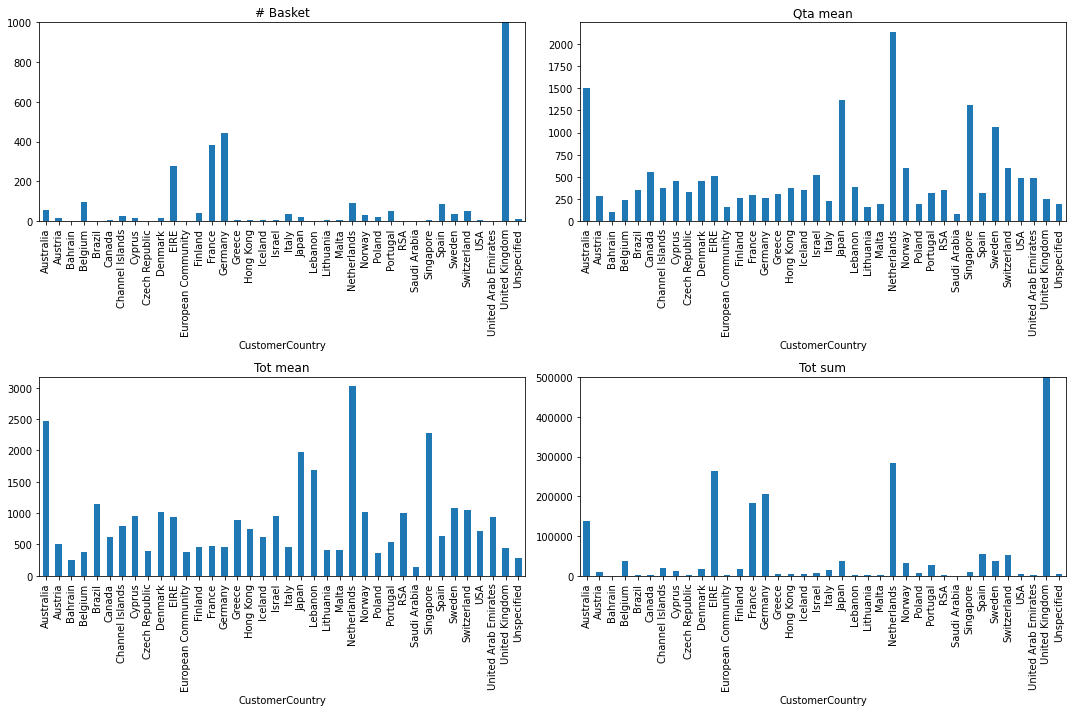

In [66]:
fig = country_distribution(df_to_plot.copy())
plt.tight_layout()
plt.savefig("./country_distribution.svg")
#plt.savefig("/content/drive/My Drive/DM/Data_Understanding/Plots/country_distribution.svg")

#### Distributions among baskets




In [67]:
def total_price_distribution_among_baskets(df, path):
  df_plot = df.groupby('BasketID').Tot.sum().reset_index()
  df_plot = df_plot[df_plot.Tot <= 1500]
  df_plot = df_plot[df_plot.Tot > 0]
  df_plot.plot.hist(by='Tot',bins=1500, figsize = (16,8))
  plt.gca().set_xlabel('Total price')
  plt.title('Total price distribution')
  plt.savefig(path + "total_price_distribution_among_baskets.svg")

def total_quantity_distribution_among_baskets(df, path):
  df_plot = df.groupby('BasketID').Qta.sum().reset_index()
  df_plot = df_plot[df_plot.Qta <= 1001]
  df_plot = df_plot[df_plot.Qta > 0]

  df_plot.plot.hist(by='Tot',bins=1001, figsize = (16,8))
  plt.gca().set_xlabel('Qta')
  plt.title('Qta distribution')
  plt.savefig(path + "total_quantity_distribution_among_baskets.svg")

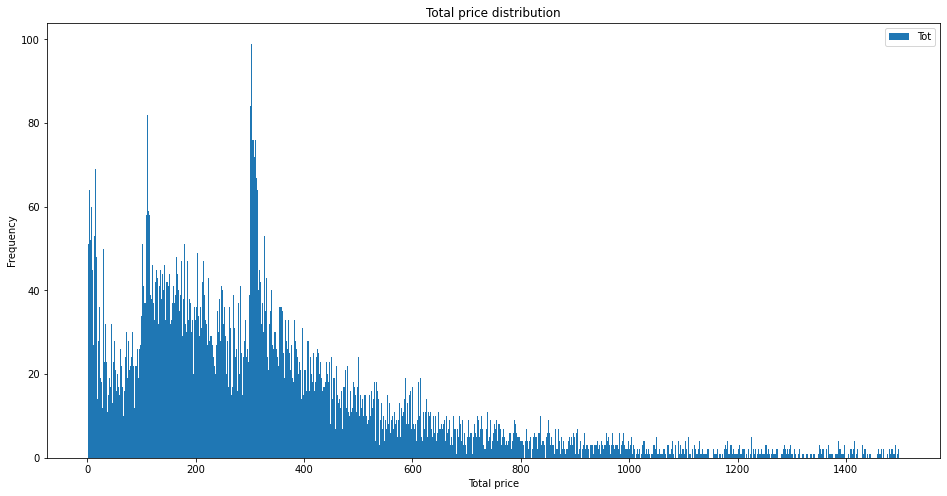

In [68]:
total_price_distribution_among_baskets(df_to_plot.copy(),'./')#"/content/drive/My Drive/DM/Data_Understanding/Plots/")

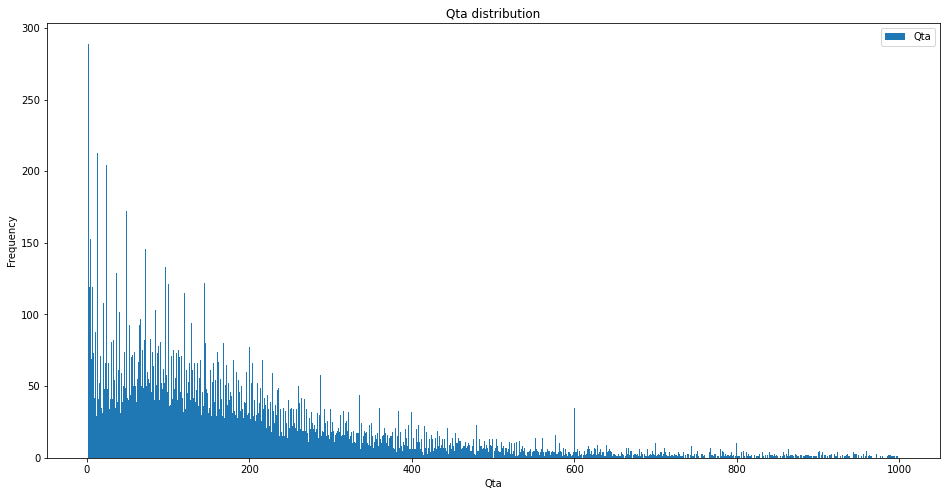

In [69]:
total_quantity_distribution_among_baskets(df_to_plot.copy(),'./' )#"/content/drive/My Drive/DM/Data_Understanding/Plots/")

#### Returns distance in time

In [70]:
res = filtered_pos_neg_join_result.copy()
res.distance_in_time = res["distance_in_time"].apply(lambda x: x.days)
res.describe()

,Sale_neg,Qta_neg,Sale_pos,Qta_pos,distance_in_time
count,12954.000000,12954.000000,12954.000000,12954.000000,12954.000000
mean,5.521688,-22.846765,5.521688,35.109927,61.319515
std,38.316622,966.864187,38.316622,967.641202,74.653881
min,0.060000,-80995.000000,0.060000,1.000000,0.000000
25%,1.450000,-5.000000,1.450000,4.000000,7.000000
50%,2.550000,-2.000000,2.550000,8.000000,28.000000
75%,4.950000,-1.000000,4.950000,16.000000,92.000000
max,2382.920000,-1.000000,2382.920000,80995.000000,368.000000


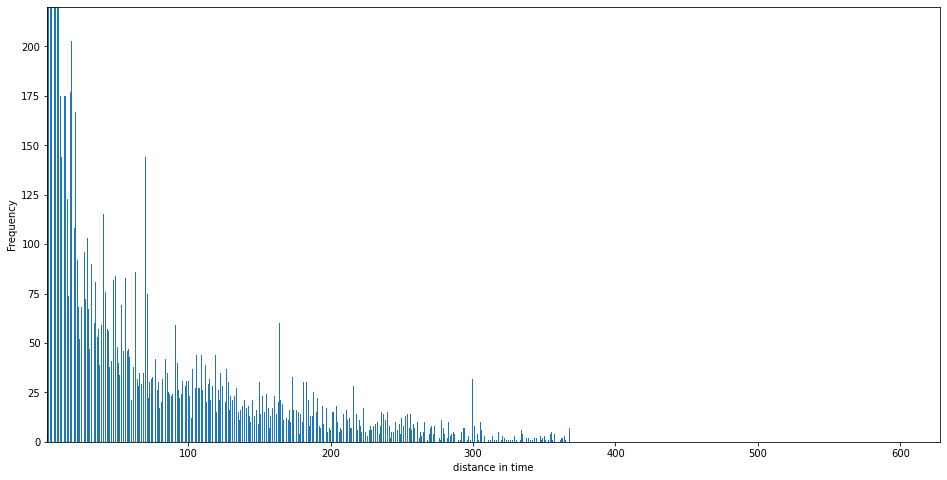

In [71]:
res["distance_in_time"].plot.hist(bins=628, figsize = (16,8))
plt.gca().set_ylim(0, 220)
plt.gca().set_xlabel('distance in time')
plt.gca().set_xlim(1,628)
plt.savefig("./distance_in_time_distribution_hist.svg")
#plt.savefig("/content/drive/My Drive/DM/Data_Understanding/Plots/distance_in_time_distribution_hist.svg")

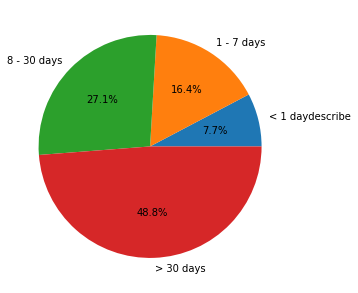

In [72]:
res = filtered_pos_neg_join_result.copy()
gt0 = res[res["distance_in_time"] < timedelta(days=1)]
gt2 = res[res["distance_in_time"] >= timedelta(days=1)]
gt2 = gt2[gt2["distance_in_time"] <= timedelta(days=7)]
gt1 = res[res["distance_in_time"] > timedelta(days=30)]

c_in_the_same_day = gt0.size
c_more_than_30 = gt1.size
c_more_than_1_less_then_8 = gt2.size
c_between_8_29 = res.size - c_in_the_same_day - c_more_than_30 - c_more_than_1_less_then_8

df_plot = pd.DataFrame({
    'value': [c_in_the_same_day, c_more_than_1_less_then_8, c_between_8_29, c_more_than_30]
    },
    index=['< 1 daydescribe','1 - 7 days','8 - 30 days', '> 30 days']
)
plot = df_plot.plot.pie(y='value', figsize=(5, 5),autopct='%1.1f%%')
plot.get_legend().remove()
plot.set_ylabel('')
plt.tight_layout()
plt.savefig("./distance_in_time_distribution_pie.png")
#plt.savefig("/content/drive/My Drive/DM/Data_Understanding/Plots/distance_in_time_distribution_pie.png")

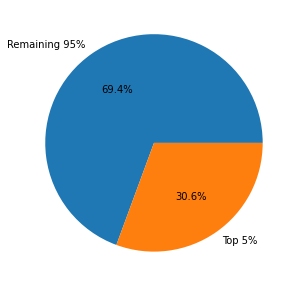

In [73]:
res = df_raw.groupby(['ProdID']).size().sort_values(ascending=False)
total_occurences = res.sum()
top_res = res[0:200].sum()
total_elements = res.size
df_plot = pd.DataFrame({
    'value': [total_occurences - top_res, top_res]
    },
    index=['Remaining 95%', 'Top 5%']
)
plot = df_plot.plot.pie(y='value', figsize=(5, 5),autopct='%1.1f%%')
plot.get_legend().remove()
plot.set_ylabel('')
plt.savefig("./top_5_pie.png")
#plt.savefig("/content/drive/My Drive/DM/Data_Understanding/Plots/top_5_pie.png")